<a href="https://colab.research.google.com/github/Jiras-1996/DataRockie-Bootcamp-Project/blob/main/Project%20-%20Python_Web_Scraping_with_gazpacho_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Python Web Scraping with gazpacho

**Date**: 24 November 2023

**Author** : Jiras Adthsutanan (Jay)

**Language** : `Python Programming`

**Data Process** : `Web Scraping`

**Dataset** : `https://www.imdb.com/search/title/?sort=user_rating,desc&groups=top_100`

**File Type** : `Website document`

## Step 01 : Parse data from website and create dataframe

In [ ]:
# install gazpacho library
!pip install gazpacho

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gazpacho: filename=gazpacho-1.1-py3-none-any.whl size=7461 sha256=76032a876e8e4893800b835e1afa574b2bf28dfc8a5fb11f4592142ae5e93bef
  Stored in directory: /root/.cache/pip/wheels/9b/bf/9f/8c8849499462415fa5cdf0d9edb1103c189bdbece90c51488e
Successfully built gazpacho


In [ ]:
# import library
import requests
from gazpacho import Soup
import pandas as pd

In [18]:
# Import website data
url = "https://www.imdb.com/search/title/?sort=user_rating,desc&groups=top_100"

html = requests.get(url,
                    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
                               'Accept-Language': 'en-US'})

In [19]:
# Create Soup object
imdb = Soup(html.text)

In [23]:
# Parse data from website data (movies, year, genre, metascore)

# movies
movies = imdb.find("h3", {"class": "ipc-title__text"})
clean_movies = [title.strip()[3:] for title in movies]
clean_last_movies = clean_movies.pop()
clean_movies

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 "Schindler's List",
 'The Godfather Part II',
 'The Lord of the Rings: The Return of the King',
 '12 Angry Men',
 'Pulp Fiction',
 'Fight Club',
 ' Inception',
 ' The Lord of the Rings: The Fellowship of the Ring',
 ' Forrest Gump',
 ' The Good, the Bad and the Ugly',
 ' The Lord of the Rings: The Two Towers',
 ' Spider-Man: Across the Spider-Verse',
 ' Interstellar',
 ' Goodfellas',
 ' The Matrix',
 " One Flew Over the Cuckoo's Nest",
 ' Star Wars: Episode V - The Empire Strikes Back',
 ' Se7en',
 ' The Silence of the Lambs',
 ' Saving Private Ryan',
 ' Spirited Away',
 " It's a Wonderful Life",
 ' The Green Mile',
 ' Star Wars: Episode IV - A New Hope',
 ' City of God',
 ' Terminator 2: Judgment Day',
 ' Life Is Beautiful',
 ' Seven Samurai',
 ' Harakiri',
 ' Oppenheimer',
 ' Gladiator',
 ' Whiplash',
 ' Parasite',
 ' The Departed',
 ' Django Unchained',
 ' Alien',
 ' The Prestige',
 ' Back to the Future',
 ' Léon: T

In [24]:
# year
year = imdb.find("div", {"class": "sc-479faa3c-7 jXgjdT dli-title-metadata"})
clean_year = [title.strip()[0:4] for title in year]
clean_year

['1994',
 '1972',
 '2008',
 '1993',
 '1974',
 '2003',
 '1957',
 '1994',
 '1999',
 '2010',
 '2001',
 '1994',
 '1966',
 '2002',
 '2023',
 '2014',
 '1990',
 '1999',
 '1975',
 '1980',
 '1995',
 '1991',
 '1998',
 '2001',
 '1946',
 '1999',
 '1977',
 '2002',
 '1991',
 '1997',
 '1954',
 '1962',
 '2023',
 '2000',
 '2014',
 '2019',
 '2006',
 '2012',
 '1979',
 '2006',
 '1985',
 '1994',
 '1995',
 '1994',
 '1998',
 '2011',
 '2002',
 '1960',
 '1942',
 '1968']

In [25]:
# genre
genre = imdb.find("div", {"class": "sc-479faa3c-7 jXgjdT dli-title-metadata"})
clean_genre = [title.strip()[10:] for title in genre]
clean_genre

['R',
 'R',
 'PG-13',
 'R',
 'R',
 'PG-13',
 'Approved',
 'R',
 'R',
 'PG-13',
 'PG-13',
 'PG-13',
 'Approved',
 'PG-13',
 'PG',
 'PG-13',
 'R',
 'R',
 'R',
 'G',
 '',
 'R',
 'R',
 'G',
 'PG',
 '',
 'G',
 'R',
 'R',
 'PG-13',
 'Not Rated',
 'Not Rated',
 '',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'PG-13',
 'PG',
 'R',
 'R',
 'G',
 'R',
 'R',
 'R',
 'R',
 'PG',
 'PG-13']

In [26]:
# metascore
metascore = imdb.find("span", {"class": "sc-b0901df4-0 bcQdDJ metacritic-score-box"})
clean_metascore = [title.strip()[0:] for title in metascore]
clean_metascore

['82',
 '100',
 '84',
 '95',
 '90',
 '94',
 '97',
 '95',
 '67',
 '74',
 '92',
 '82',
 '90',
 '87',
 '86',
 '74',
 '92',
 '73',
 '84',
 '82',
 '65',
 '86',
 '91',
 '96',
 '89',
 '61',
 '90',
 '79',
 '75',
 '59',
 '98',
 '85',
 '88',
 '67',
 '89',
 '96',
 '85',
 '81',
 '89',
 '66',
 '87',
 '64',
 '77',
 '88',
 '62',
 '57',
 '85',
 '97',
 '100',
 '82']

In [27]:
# Create Dataframe
IMDB = pd.DataFrame(data={
    "movies": clean_movies,
    "year": clean_year,
    "genre" : clean_genre,
    "metascore": clean_metascore
})

IMDB

,movies,year,genre,metascore
0,The Shawshank Redemption,1994,R,82
1,The Godfather,1972,R,100
2,The Dark Knight,2008,PG-13,84
3,Schindler's List,1993,R,95
4,The Godfather Part II,1974,R,90
5,The Lord of the Rings: The Return of the King,2003,PG-13,94
6,12 Angry Men,1957,Approved,97
7,Pulp Fiction,1994,R,95
8,Fight Club,1999,R,67
9,Inception,2010,PG-13,74


## Step 02 : Create csv file from dataframe

In [28]:
# Write data to csv file
IMDB.to_csv('drive/MyDrive/dataset/IMDB.csv', index=False)

In [3]:
# import library
import pandas as pd

# Read csv file
IMDB_df = pd.read_csv('drive/MyDrive/dataset/IMDB.csv')
IMDB_df

,movies,year,genre,metascore
0,The Shawshank Redemption,1994,R,82
1,The Godfather,1972,R,100
2,The Dark Knight,2008,PG-13,84
3,Schindler's List,1993,R,95
4,The Godfather Part II,1974,R,90
5,The Lord of the Rings: The Return of the King,2003,PG-13,94
6,12 Angry Men,1957,Approved,97
7,Pulp Fiction,1994,R,95
8,Fight Club,1999,R,67
9,Inception,2010,PG-13,74


## Step 03 : Data Preparation and Exploration

In [4]:
IMDB_df.head()

,movies,year,genre,metascore
0,The Shawshank Redemption,1994,R,82
1,The Godfather,1972,R,100
2,The Dark Knight,2008,PG-13,84
3,Schindler's List,1993,R,95
4,The Godfather Part II,1974,R,90


In [5]:
IMDB_df.tail()

,movies,year,genre,metascore
45,The Intouchables,2011,R,57
46,The Pianist,2002,R,85
47,Psycho,1960,R,97
48,Casablanca,1942,PG,100
49,Once Upon a Time in the West,1968,PG-13,82


In [6]:
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movies     50 non-null     object
 1   year       50 non-null     int64 
 2   genre      47 non-null     object
 3   metascore  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


## Step 04 : Data Analysis & Visualization

### Question 01 : Genre in Top 50 IMDB movies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

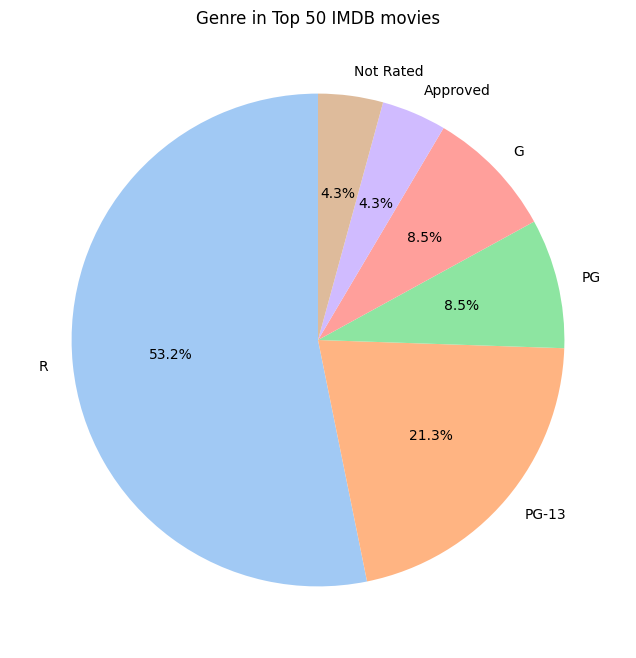

In [7]:
genre_counts = IMDB_df['genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, \
        colors=sns.color_palette('pastel'))
plt.title('Genre in Top 50 IMDB movies')
plt.show()

### Question 02 : Top 10 metascore in IMDB movies

In [8]:
IMDB_meta_year = IMDB_df.sort_values(['metascore'], ascending = False).head(10)
IMDB_meta_year

,movies,year,genre,metascore
48,Casablanca,1942,PG,100
1,The Godfather,1972,R,100
30,Seven Samurai,1954,Not Rated,98
6,12 Angry Men,1957,Approved,97
47,Psycho,1960,R,97
35,Parasite,2019,R,96
23,Spirited Away,2001,G,96
3,Schindler's List,1993,R,95
7,Pulp Fiction,1994,R,95
5,The Lord of the Rings: The Return of the King,2003,PG-13,94
